# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

## Import API key
from api_keys import api_key

## Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Output File (CSV)
output_data_file = "output_data/cities.csv"

## Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
## List for holding lat_lngs and cities
lat_lngs = []
cities = []

## Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

## Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    ## If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

## Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + api_key

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("-------------------------------")

record = 1
for city in cities:
    
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increasing counter by one 
        record= record + 1
        
        # Waiting a second in loop to not over exceed rate limit of API
        time.sleep(1)
    except:    
           print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | El Jicaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=el jicaro
Processing Record 2 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=broken hill
Processing Record 3 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=avera
Processing Record 4 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=avarua
Processing Record 5 | Mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=mayumba
Processing Record 6 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=constitucion
Processing Record 7 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 57 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=chapais
Processing Record 58 | Mossendjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=mossendjo
Processing Record 59 | Katete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=katete
Processing Record 60 | Zonguldak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=zonguldak
Processing Record 61 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=iqaluit
Processing Record 62 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=carnarvon
City not found. Skipping...
Processing Record 63 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4

Processing Record 112 | Colares
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=colares
Processing Record 113 | Fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=fortuna
Processing Record 114 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=mount gambier
Processing Record 115 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=bredasdorp
City not found. Skipping...
Processing Record 116 | Abay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=abay
City not found. Skipping...
Processing Record 117 | Simao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=simao
Processing Record 118 | Mount Isa
http://api.openweathermap.org/data/2.5/weath

Processing Record 167 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=praia da vitoria
Processing Record 168 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=ribeira grande
Processing Record 169 | Iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=iskateley
Processing Record 170 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=lebu
Processing Record 171 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=talcahuano
Processing Record 172 | Sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=sangar
Processing Record 173 | Zambezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f2

Processing Record 222 | Pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=pitimbu
Processing Record 223 | Casteldaccia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=casteldaccia
Processing Record 224 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=katsuura
Processing Record 225 | Baoding
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=baoding
Processing Record 226 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=upernavik
Processing Record 227 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=nome
City not found. Skipping...
Processing Record 228 | Barabai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5

Processing Record 278 | Ilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=ilo
City not found. Skipping...
Processing Record 279 | Sawang Daen Din
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=sawang daen din
Processing Record 280 | Bumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=bumba
City not found. Skipping...
Processing Record 281 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=kodiak
Processing Record 282 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=marsh harbour
Processing Record 283 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=kavieng
Processing Record 284 | Luangwa
http://api.openweathermap.org/data/2.5/w

Processing Record 332 | Guozhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=guozhen
Processing Record 333 | Bacolod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=bacolod
City not found. Skipping...
Processing Record 334 | Udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=udachnyy
Processing Record 335 | Tanout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=tanout
Processing Record 336 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=hasaki
City not found. Skipping...
Processing Record 337 | Kropotkin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=kropotkin
Processing Record 338 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 387 | Japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=japura
Processing Record 388 | Watsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=watsa
Processing Record 389 | Mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=mahebourg
Processing Record 390 | Sebinkarahisar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=sebinkarahisar
Processing Record 391 | Payo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=payo
Processing Record 392 | Traunstein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=traunstein
Processing Record 393 | Orlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e

Processing Record 443 | Naron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=naron
Processing Record 444 | Artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=artyom
City not found. Skipping...
Processing Record 445 | Gawler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=gawler
Processing Record 446 | Waterloo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=waterloo
Processing Record 447 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=komsomolskiy
Processing Record 448 | Klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=klyuchi
Processing Record 449 | Nioki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7

Processing Record 499 | Trinidad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=trinidad
Processing Record 500 | Abu Zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=abu zabad
Processing Record 501 | Shenzhen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=shenzhen
Processing Record 502 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=vila franca do campo
Processing Record 503 | Shiloh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=shiloh
Processing Record 504 | Khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a54760a85d4089b11f3e&q=khani
Processing Record 505 | Kuhdasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=4ab5c3f275f7a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

## Creating data frame from dictionary
weather_data_df = pd.DataFrame(weather_dict)

## Display count of weather data values 
weather_data_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [7]:
## Display the DataFrame
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,El Jicaro,8,GT,1551149843,69,14.91,-89.89,65.57,1.59
1,Broken Hill,20,AU,1551146400,13,-31.97,141.45,89.60,5.82
2,Avera,1,US,1551149822,70,33.19,-82.53,48.99,4.38
3,Avarua,0,CK,1551148200,65,-21.21,-159.78,82.40,13.87
4,Mayumba,92,GA,1551149849,100,-3.44,10.65,80.15,4.05


In [8]:
## Export the city data into a .csv.
weather_data_df.to_csv("output_files/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

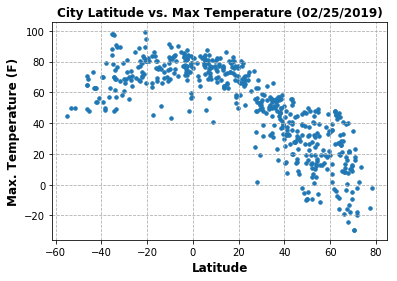

In [9]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker = "o", s = 12)


plt.title("City Latitude vs. Max Temperature (02/25/2019)", fontsize = 12, fontweight = "bold")
plt.ylabel("Max. Temperature (F)", fontsize = 12, weight = "bold")
plt.xlabel("Latitude", fontsize = 12, weight = "bold")
plt.grid(True)
plt.grid(ls="--")


plt.savefig("output_files/max_temperature_vs_latitude.png")


plt.show()

#### Latitude vs. Humidity Plot

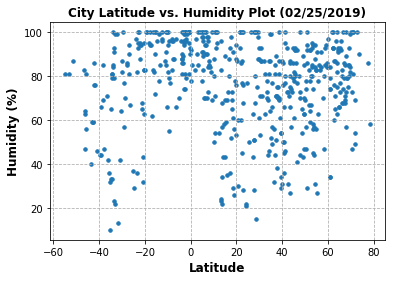

In [10]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o", s = 12)


plt.title("City Latitude vs. Humidity Plot (02/25/2019)", fontsize = 12, fontweight = "bold")
plt.ylabel("Humidity (%)", fontsize = 12, weight = "bold")
plt.xlabel("Latitude", fontsize = 12, weight = "bold")
plt.grid(True)
plt.grid(ls="--")

plt.savefig("output_files/humidity_vs_latitude.png")


plt.show()

#### Latitude vs. Cloudiness Plot

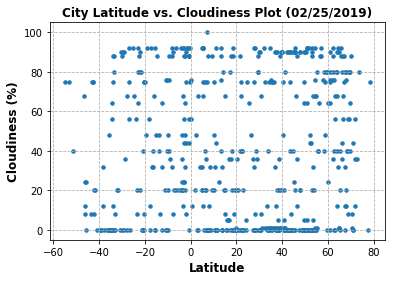

In [11]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker = "o", s = 12)


plt.title("City Latitude vs. Cloudiness Plot (02/25/2019)", fontsize = 12, fontweight = "bold")
plt.ylabel("Cloudiness (%)", fontsize = 12, weight = "bold")
plt.xlabel("Latitude", fontsize = 12, weight = "bold")
plt.grid(True)
plt.grid(ls="--")

plt.savefig("output_files/cloudiness_vs_latitude.png")


plt.show()

#### Latitude vs. Wind Speed Plot

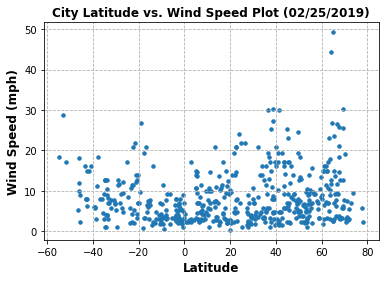

In [12]:
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker = "o", s = 12)


plt.title("City Latitude vs. Wind Speed Plot (02/25/2019)", fontsize = 12, fontweight = "bold")
plt.ylabel("Wind Speed (mph)", fontsize = 12, weight = "bold")
plt.xlabel("Latitude", fontsize = 12, weight = "bold")
plt.grid(True)
plt.grid(ls="--")

plt.savefig("output_files/wind_speed_vs_latitude.png")


plt.show()